In [2]:
setwd("/projects/CARDIPS/analysis/epigenome_resource")
source("analyses/jennifer/notebooks/functions.R")

set.seed(5366)
library(coloc)

# Prepare hapmap snps

In [7]:
# snps_ldsc = fread("/reference/public/ldsc/w_hm3.snplist", data.table = F)
# snps_hg38 = fread("/frazer01/home/jennifer/references/hapmap/hapmap_3.3.hg38.txt", data.table = F)

In [8]:
# head(snps_hg38,2)
# head(snps_ldsc,2)

In [9]:
# snps_hg38_ldsc = snps_hg38 %>% filter(V3 %in% snps_ldsc$SNP)

In [10]:
# head(snps_hg38_ldsc)

# Filter 1000 Genomes VCF for hapmap snps

In [11]:
# for (chr in paste0("chr", c(1:22)))
# {
#     out = snps_hg38_ldsc %>% filter(V1 == chr) %>% select(V1, V2) %>% mutate(V3 = V2-1) %>% select(V1, V3, V2)
#     out$V1 = gsub("chr", "", out$V1)
#     fwrite(out, paste("analyses/jennifer/ldsc/1kg_input", paste0(chr, "_hapmap.bed"), sep = "/"), row.names = F, sep = "\t", col.names = F)
# }


In [12]:
# for (i in c(1:22))
# {
#     vcf=paste0("/reference/public/1000Genomes_hg38/ALL.chr", i, ".shapeit2_integrated_snvindels_v2a_27022019.GRCh38.phased.vcf.gz")
#     bed=paste("analyses/jennifer/ldsc/1kg_input", paste0('chr', i, "_hapmap.bed"), sep = "/")
#     out=paste0("analyses/jennifer/ldsc/1kg_input/1000Genomes_chr", i, "_hapmap.vcf")
#     cmd=paste("bedtools intersect -a", vcf, "-b", bed, "-header", ">", out)
#     qsub=paste("echo", paste0("\"", cmd, "\""), "| qsub -N", paste0("chr", i), "-V -cwd -pe smp 4", 
#                "-o", paste0("analyses/jennifer/ldsc/logs/chr", i, ".out"), 
#                "-e", paste0("analyses/jennifer/ldsc/logs/chr", i, ".err"))
#     message(qsub)
#     system(qsub)
# }

# Rename

In [13]:
# for (i in c(1:22))
# {
#     vcf = paste0("/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/1kg_input/", i, "_1KG_Hapmap.vcf")
#     out_vcf = paste0("/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/1kg_input/", i, "_1KG_Hapmap.renamed.vcf")
#     cmd = paste("bcftools annotate --set-id '%CHROM\\_%POS\\_%REF\\_%ALT'", vcf, ">", out_vcf)
#     qsub = paste("echo", paste0("\"", cmd, "\""), "| qsub -N rename -V -cwd -o logs -e logs -pe smp 4")
#     message(qsub)
#     system(qsub)
# }


# Make Bfiles

In [14]:
# for (i in c(1:22))
# {
#     vcf = paste0("/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/1kg_input/", i, "_1KG_Hapmap.renamed.vcf")
#     prefix = paste(getwd(), "analyses/jennifer/ldsc/1kg_input", i, sep = "/")
#     cmd = paste("plink --vcf", vcf, "--make-bed", "--out", prefix, "--memory 15000 --threads 4")
#     qsub = paste("echo", paste0("\"", cmd, "\""), "| qsub -N", paste0("chr", i), "-hold_jid", paste0("chr", i), "-V -cwd -pe smp 4", 
#                "-o", paste(getwd(), "analyses/jennifer/ldsc/logs", paste0("chr", i, "_plink.out"), sep = "/"), 
#                "-e", paste(getwd(), "analyses/jennifer/ldsc/logs", paste0("chr", i, "_plink.err"), sep = "/"))
#     message(qsub)
#     system(qsub)
# }


In [15]:
# for i in {1..22}; do mv ${i}.log ${i}.bfile.log; done

# Prepare snp list

In [329]:
# kg_snps = as.data.frame(rbindlist(lapply(c(1:22), function(x)
# {
#     message(x, appendLF = F)
#     file = paste("analyses/jennifer/ldsc/1kg_input", paste0(x, ".bim"), sep = "/")
#     fread(file, data.table = F, header = F)
# })))

In [130]:
# a = snps_hg38_ldsc %>% select(V1, V2, V3, V4, V5)
# colnames(a) = c("chr", "pos", "rsid", "ref", "alt")
# a$chr = gsub("chr", "", a$chr)

In [131]:
# b = kg_snps %>% select(V1, V2, V4, V5, V6)
# colnames(b) = c("chr", "id", "pos", "ref", "alt")

In [132]:
# c = merge(a, b, by = c("chr", "pos"), all.y = T) %>% distinct()

In [133]:
# c1 = c[c$ref.x == c$ref.y & c$alt.x == c$alt.y,]
# c2 = c[c$ref.x == c$alt.y & c$alt.x == c$ref.y,]

# c = rbind(c1, c2)

In [134]:
# d = c %>% select(id, ref.y, alt.y)

In [137]:
# d = d[complete.cases(d),]

In [149]:
# colnames(d) = c("SNP", "A1", "A2")

In [330]:
# fwrite(d, "analyses/jennifer/ldsc/1kg_input/1KG_hapmap_snps.list", row.names = F, sep = "\t", col.names = F)

# Extract final snps

In [326]:
# for (i in c(1:22))
# {
#     vcf = paste0("/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/1kg_input/", i, "_1KG_Hapmap.renamed.vcf")
#     prefix = paste(getwd(), "analyses/jennifer/ldsc/1kg_input", i, sep = "/")
#     snplist = paste(getwd(), "analyses/jennifer/ldsc/1kg_input/1KG_hapmap_snps.list", sep = "/")
#     cmd = paste("plink", 
#                 "--bfile", prefix, 
#                 "--make-bed", 
#                 "--out", paste(prefix, "filt", sep = "."), 
#                 "--extract", snplist,
#                 "--memory 15000 --threads 4")
#     qsub = paste("echo", paste0("\"", cmd, "\""), "| qsub -N", paste0("chr", i), "-hold_jid", paste0("chr", i), "-V -cwd -pe smp 4", 
#                "-o", paste(getwd(), "analyses/jennifer/ldsc/logs", paste0("chr", i, "_plink.out"), sep = "/"), 
#                "-e", paste(getwd(), "analyses/jennifer/ldsc/logs", paste0("chr", i, "_plink.err"), sep = "/"))
#     message(qsub)
#     system(qsub)
# }


# Make ldscore

In [325]:
# for (i in c(1:22))
# {
#     bfile = paste("/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/1kg_input", paste(i, "filt", sep = "."), sep = "/")
#     out = paste("/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/1kg_input", i, sep = "/")
#     cmd = paste("source /frazer01/home/jennifer/.bash_profile; source activate ldsc; python ~/software/ldsc/ldsc.py --bfile", bfile, "--l2 --ld-wind-kb 500 --out", out)
#     qsub = paste("echo", paste0("\"", cmd, "\""), "| qsub -N ldscore -V -cwd -o analyses/jennifer/ldsc/logs -e analyses/jennifer/ldsc/logs -pe smp 8")
#     message(qsub)
#     system(qsub)
# }


## 0. Reformat GWAS summary statistics for munge

In [167]:
out = snps_hg38_ldsc
out$V1 = gsub("chr", "", out$V1)
out$CHRPOS = paste(out$V1, out$V2, sep = "_")
colnames(out) = c("CHR", "POS", "SNP", "A1", "A2", "?", "PASS", "INFO", "CHRPOS")
fwrite(out, "analyses/jennifer/ldsc/sumstats/hapmap_hg38_rsid2pos.txt", row.names = F, sep = "\t")

In [295]:
# # filter for hapmap snps
# # A1 is increasing variant
# SNP     A1      A2      Z       N

In [170]:
# manifest_file = "/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_coloc/input/manifest.txt"
# manifest = fread(manifest_file, data.table = F)
# manifest %>% filter(description %like% "birth")

trait_id,trait_type,coding_description,description,full_trait_id,filename,exists
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
BW3_EUR_summary_stats,continuous,,birth weight (eur),BW3_EUR_summary_stats,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/BW3_EUR_summary_stats.hg38.tsv.gz,TRUE
BW3_Transethnic_summary_stats,continuous,,birth weight (transethnic),BW3_Transethnic_summary_stats,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/BW3_Transethnic_summary_stats.hg38.tsv.gz,TRUE
Fetal_postterm_birth_NComms2019,case_control,,fetal post-term birth,Fetal_postterm_birth_NComms2019,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/Fetal_postterm_birth_NComms2019.hg38.tsv.gz,TRUE
Fetal_preterm_birth_NComms2019,case_control,,fetal pre-term birth,Fetal_preterm_birth_NComms2019,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/Fetal_preterm_birth_NComms2019.hg38.tsv.gz,TRUE
HC_BIRTH.filteredDf0,continuous,,head circumferance birth,HC_BIRTH.filteredDf0,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/HC_BIRTH.filteredDf0.hg38.tsv.gz,TRUE


In [169]:
# fwrite(d, "analyses/jennifer/ldsc/1kg_input/1KG_hapmap_snps.for_munge.list", row.names = F, sep = "\t")

## 0. Run munge

In [337]:
# index = 2
# file = manifest$filename[i]
# full_trait_id = manifest$full_trait_id[i]
# cmd = paste("source /frazer01/home/jennifer/.bash_profile; source activate ldsc; python ~/software/ldsc/munge_sumstats.py", 
#             "--sumstats", paste(getwd(), "analyses/jennifer/ldsc/sumstats", "biomarkers-30740-both_sexes-irnt.meta.to_ldsc.txt", sep = "/"),
#             "--merge-alleles", paste(getwd(), "analyses/jennifer/ldsc/1kg_input/1KG_hapmap_snps.for_munge.list", sep = "/"),
#             "--out", paste(getwd(), "analyses/jennifer/ldsc/sumstats", "biomarkers-30740-both_sexes-irnt.meta", sep = "/"), 
#             "--a1-inc")

# log_out = paste(getwd(), "analyses/jennifer/ldsc/logs", paste("munge", full_trait_id, sep = "."), sep = "/")
# log_err = paste(getwd(), "analyses/jennifer/ldsc/logs", paste("munge", full_trait_id, sep = "."), sep = "/")

# run_qsub(cmd = cmd, name = full_trait_id, log_out = log_out, log_err = log_err, exec = T, threads = 8)




In [334]:
# data = fread("/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/BW3_EUR_summary_stats.hg38.tsv.gz", data.table = F)
# colnames(data) = toupper(colnames(data))
# data2 = data[data$RSID %in% hapmap$SNP,] %>% select(-EAF) %>% dplyr::rename(SNP = RSID)
# merge = merge(data2, hapmap, by = "SNP")
# a = merge[merge$A1.x == merge$A1.y & merge$A2.x == merge$A2.y,]
# b = merge[merge$A1.x == merge$A2.y & merge$A2.x == merge$A1.y,]
# a$BETA = a$BETA * -1
# merge = rbind(a, b) %>% select(-A1.x, -A2.x) %>% dplyr::rename(A1 = A1.y, A2 = A2.y)
# merge$CHR = gsub("chr", "", merge$CHR)
# fwrite(merge, "analyses/jennifer/ldsc/sumstats/BW3_EUR_summary_stats.hg38.hapmap.to_munge.txt", row.names = F, sep = "\t")

In [335]:
# python ~/software/ldsc/munge_sumstats.py --sumstats BW3_EUR_summary_stats.hg38.hapmap.to_munge.txt --out BW3_EUR_summary_stats.hg38.hapmap --a1-inc

In [336]:
# refdir=/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference
# python ~/software/ldsc/ldsc.py --h2 sumstats/BW3_EUR_summary_stats.hg38.hapmap.sumstats.gz --ref-ld-chr ${refdir}/baseline_v1.2/baseline. --w-ld-chr ${refdir}/weights/weights.hm3_noMHC. --overlap-annot --frqfile-chr ${refdir}/1000G_Phase3_frq/1000G.EUR.QC. --out h2/BW3_EUR_summary_stats.hg38.hapmap

## 1. Prepare annotation bed files

In [2]:
# geneinfo = fread("/reference/private/Gencode.v44lift38/gene_info.txt", data.table = F) %>% select(gene_id, chrom, start, end)
# colnames(geneinfo) = c("GENE", "CHR", "START", "END")
# fwrite(geneinfo, "analyses/jennifer/ldsc/annot/gene_info.txt", row.names = F, sep = "\t")

In [3]:
# peak_info = paste(analysis, tissue, "input/phenotype_info.txt", sep = "/")
# peak_info = fread(peak_info, data.table = F)

In [5]:
load("caqtls/CVPC/step_1/expdata.robj", verbose = T)

Loading objects:
  expdata


In [8]:
names(expdata)

head(expdata$element_ids,2)

[1] "expressed_tmm"  "normalized_tmm" "element_ids"    "phenotype_ids"

[1] "cvpc_atac_peak_10"  "cvpc_atac_peak_100"

In [19]:
for (tissue in c("CVPC",  "iPSC", "PPC"))
{
    for (analysis in c("caqtls", "haqtls"))
    {
        dir.create(paste("analyses/jennifer/ldsc/annot", paste(tissue, analysis, "exp_peaks", sep = "."), sep = "/"))
        peak_info = paste(analysis, tissue, "input/phenotype_info.txt", sep = "/")
        load(paste(analysis, tissue, "step_1/expdata.robj", sep = "/"), verbose = T)
        
        if (file.exists(peak_info))
        {
            peak_info = fread(peak_info, data.table = F) %>% filter(element_id %in% expdata$element_ids)
            for (i in c(1:22))
            {
                outfile = paste("analyses/jennifer/ldsc/annot", paste(tissue, analysis, "exp_peaks", sep = "."), paste(i, "bed", sep = "."), sep = "/")
                fwrite(peak_info %>% filter(chrom == paste0("chr", i)) %>% select(chrom, start, end), outfile, row.names = F, sep = "\t", col.names = F)
                message(paste("Saved:", outfile), appendLF = F)
            }
        }   
    }
}


Warning message in dir.create(paste("analyses/jennifer/ldsc/annot", paste(tissue, :
“'analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks' already exists”


Loading objects:
  expdata


Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/1.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/2.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/3.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/4.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/5.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/6.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/7.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/8.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/9.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/10.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/11.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/12.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/13.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/14.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/15.bed
Saved: analyses/jennifer/ldsc/anno

Loading objects:
  expdata


Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/1.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/2.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/3.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/4.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/5.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/6.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/7.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/8.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/9.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/10.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/11.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/12.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/13.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/14.bed
Saved: analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/15.bed
Saved: analyses/jennifer/ldsc/anno

Loading objects:
  expdata


Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/1.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/2.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/3.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/4.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/5.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/6.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/7.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/8.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/9.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/10.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/11.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/12.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/13.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/14.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/15.bed
Saved: analyses/jennifer/ldsc/anno

Loading objects:
  expdata


Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/1.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/2.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/3.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/4.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/5.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/6.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/7.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/8.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/9.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/10.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/11.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/12.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/13.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/14.bed
Saved: analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/15.bed
Saved: analyses/jennifer/ldsc/anno

Loading objects:
  expdata


Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/1.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/2.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/3.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/4.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/5.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/6.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/7.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/8.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/9.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/10.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/11.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/12.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/13.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/14.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/15.bed
Saved: analyses/jennifer/ldsc/annot/PPC.caqtls.ex

ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


## 2. Prepare annotation file

In [20]:
dir.create(paste("analyses/jennifer/ldsc/annot", "exp_peaks_together", sep = "/"))

In [21]:
for (chr in c(1:22))
{
    message(chr, appendLF = F)
    
    # Read baseline variants
    annot = paste("analyses/jennifer/ldsc/reference/baseline_v1.2", paste("baseline", chr, "annot.gz", sep = "."), sep = "/")
    annot = fread(annot, data.table = F)
    annot$snp_id = paste(annot$CHR, annot$BP, sep = "_")
    order = annot$BP

    # Write baseline variants as bed
    b_bed = annot %>% select(CHR, BP) %>% mutate(end = BP, CHR = paste0("chr", CHR))
    fwrite(b_bed, "analyses/jennifer/scratch/b.bed", row.names = F, sep = "\t", col.names = F)
    
    for(tissue in c("CVPC", "iPSC", "PPC"))
    {
        for (analysis in c("caqtls", "haqtls"))
        {
            a = paste("analyses/jennifer/ldsc/annot", paste(tissue, analysis, "exp_peaks", sep = "."), paste(chr, "bed", sep = "."), sep = "/")
            if (file.exists(a))
            {
                b = "analyses/jennifer/scratch/b.bed"
                cmd = paste("bedtools intersect", "-a", a, "-b", b, "-wa -wb")
                message(cmd, appendLF = F)
                int = fread(cmd = cmd, data.table = F)

                annot[,paste(tissue, analysis, sep = "_")] = ifelse(annot$BP %in% int$V5, 1, 0)
                print(table(annot[,paste(tissue, analysis, sep = "_")]))
            }
        }
    }

    annot$snp_id = NULL
    annot = annot[,c(1:4, 58:ncol(annot))]
    annotfile = paste("analyses/jennifer/ldsc/annot", "exp_peaks_together", paste(chr, "annot.gz", sep = "."), sep = "/")
    fwrite(annot, annotfile, row.names = F, sep = "\t")
    message(paste("Saved:", annotfile), appendLF = F)
}
    

1
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/1.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
745572  33031 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/1.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
744115  34488 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/1.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
750310  28293 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/1.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
750661  27942 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/1.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
738003  40600 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/1.annot.gz
2
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/2.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
810330  28927 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/2.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
811255  28002 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/2.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
814915  24342 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/2.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
818319  20938 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/2.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
802982  36275 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/2.annot.gz
3
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/3.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
683348  22815 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/3.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
682744  23419 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/3.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
687319  18844 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/3.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
688591  17572 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/3.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
679224  26939 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/3.annot.gz
4
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/4.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
710681  18865 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/4.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
709832  19714 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/4.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
713472  16074 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/4.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
714549  14997 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/4.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
706953  22593 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/4.annot.gz
5
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/5.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
613122  19874 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/5.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
612536  20460 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/5.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
616210  16786 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/5.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
618148  14848 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/5.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
609189  23807 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/5.annot.gz
6
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/6.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
643465  20213 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/6.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
642934  20744 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/6.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
645134  18544 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/6.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
647072  16606 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/6.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
637163  26515 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/6.annot.gz
7
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/7.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
569698  19346 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/7.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
571201  17843 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/7.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
570983  18061 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/7.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
570336  18708 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/7.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
565179  23865 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/7.annot.gz
8
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/8.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
532642  16914 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/8.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
533084  16472 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/8.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
535835  13721 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/8.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
537384  12172 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/8.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
529580  19976 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/8.annot.gz
9
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/9.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
421863  15962 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/9.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
422223  15602 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/9.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
423571  14254 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/9.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
422670  15155 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/9.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
417485  20340 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/9.annot.gz
10
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/10.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
490312  20084 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/10.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
489873  20523 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/10.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
494359  16037 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/10.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
496159  14237 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/10.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
485312  25084 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/10.annot.gz
11
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/11.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
475231  18522 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/11.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
475373  18380 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/11.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
477334  16419 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/11.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
479425  14328 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/11.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
470118  23635 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/11.annot.gz
12
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/12.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
463036  16996 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/12.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
460952  19080 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/12.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
465608  14424 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/12.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
462063  17969 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/12.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
459900  20132 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/12.annot.gz
13
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/13.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
356410   9678 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/13.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
355618  10470 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/13.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
357474   8614 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/13.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
358472   7616 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/13.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
353652  12436 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/13.annot.gz
14
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/14.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
313463  10502 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/14.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
312936  11029 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/14.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
314226   9739 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/14.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
314591   9374 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/14.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
309744  14221 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/14.annot.gz
15
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/15.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
275940  11005 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/15.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
274680  12265 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/15.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
276859  10086 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/15.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
278263   8682 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/15.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
273074  13871 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/15.annot.gz
16
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/16.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
304264  12698 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/16.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
306116  10846 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/16.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
304545  12417 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/16.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
302517  14445 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/16.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
299577  17385 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/16.annot.gz
17
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/17.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
256051  12713 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/17.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
254876  13888 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/17.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
255977  12787 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/17.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
254072  14692 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/17.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
250981  17783 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/17.annot.gz
18
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/18.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
275968   9166 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/18.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
276534   8600 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/18.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
277715   7419 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/18.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
279207   5927 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/18.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
273869  11265 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/18.annot.gz
19
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/19.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
221004  10690 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/19.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
219691  12003 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/19.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
218285  13409 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/19.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
213030  18664 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/19.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
216127  15567 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/19.annot.gz
20
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/20.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
212447   9135 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/20.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
213152   8430 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/20.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
212752   8830 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/20.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
212748   8834 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/20.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
208881  12701 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/20.annot.gz
21
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/21.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
134754   3900 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/21.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
134558   4096 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/21.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
134710   3944 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/21.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
134249   4405 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/21.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
132836   5818 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/21.annot.gz
22
bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.caqtls.exp_peaks/22.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
133006   7586 


bedtools intersect -a analyses/jennifer/ldsc/annot/CVPC.haqtls.exp_peaks/22.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
132936   7656 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.caqtls.exp_peaks/22.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
132760   7832 


bedtools intersect -a analyses/jennifer/ldsc/annot/iPSC.haqtls.exp_peaks/22.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
131427   9165 


bedtools intersect -a analyses/jennifer/ldsc/annot/PPC.caqtls.exp_peaks/22.bed -b analyses/jennifer/scratch/b.bed -wa -wb



     0      1 
129560  11032 


Saved: analyses/jennifer/ldsc/annot/exp_peaks_together/22.annot.gz


## 3. Estimate LDScore

In [22]:
# source /frazer01/home/jennifer/.bash_profile; source activate ldsc

for (CHR in c(1:22))
{
    bfile = paste0("/frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/plink_files/1000G.EUR.hg38.", CHR)
    annot = paste0("/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/annot/exp_peaks_together/", CHR, ".annot.gz")
    out = paste0("/frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/annot/exp_peaks_together/", CHR)
    snps = paste0("/frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/baseline_snps/baseline.", CHR, ".snps")
    cmd = paste("source /frazer01/home/jennifer/.bash_profile; source activate ldsc;",
              "python ~/software/ldsc/ldsc.py --l2",
                "--ld-wind-cm 1",
                "--bfile", bfile,
                "--annot", annot,
                "--out", out,
                "--print-snps", snps,
                "--annot-name \"L2\"",
                "--yes-really")
    message(cmd)
    
    log_out = paste(getwd(), "analyses/jennifer/ldsc/logs", paste("ldscore.exp_peaks",  CHR, "out", sep = "."), sep = "/")
    log_err = paste(getwd(), "analyses/jennifer/ldsc/logs", paste("ldscore.exp_peaks",  CHR, "err", sep = "."), sep = "/")
    run_qsub(cmd = cmd, name = paste("score", CHR, sep = "."), log_err = log_err, log_out = log_out, threads = 4, exec = T)
     
}

# python ~/software/ldsc/ldsc.py --l2 \
# --bfile /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/plink_files/1000G.EUR.hg38.${CHR} --ld-wind-cm 1 \
# --annot /projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/annot/with_baseline/${CHR}.annot.gz \
# --out /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/annot/with_baseline/${CHR} \
# --print-snps /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/baseline_snps/baseline.${CHR}.snps \
# --annot-name "L2" \
# --yes-really

source /frazer01/home/jennifer/.bash_profile; source activate ldsc; python ~/software/ldsc/ldsc.py --l2 --ld-wind-cm 1 --bfile /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/plink_files/1000G.EUR.hg38.1 --annot /projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/annot/exp_peaks_together/1.annot.gz --out /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/annot/exp_peaks_together/1 --print-snps /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/baseline_snps/baseline.1.snps --annot-name "L2" --yes-really

echo "source /frazer01/home/jennifer/.bash_profile; source activate ldsc; python ~/software/ldsc/ldsc.py --l2 --ld-wind-cm 1 --bfile /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/plink_files/1000G.EUR.hg38.1 --annot /projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/annot/exp_peaks_together/1.annot.gz --out 

## 4. Heritability enrichment

In [56]:
# sub_manifest = fread("analyses/jennifer/gwas_independent/subset_manifest.txt", data.table = F)
manifest = fread("analyses/jennifer/gwas_coloc/input/manifest.txt", data.table = F)
sumstats = list.files(paste(getwd(), "analyses/jennifer/ldsc/sumstats", sep = "/"), full.names = T)
sumstats = sumstats[which(sumstats %like% "gz")]

In [57]:
head(sumstats,2)

[1] "/frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/sumstats/AD_sumstats_Jansenetal_2019sept.hg38.hapmap.sumstats.gz"
[2] "/frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/sumstats/all_psychiatric_disorders.meta.hg38.hapmap.sumstats.gz"

In [25]:
dir.create("analyses/jennifer/ldsc/h2/exp_peaks_together")

In [59]:
head(traits,2)

[1] "AD_sumstats_Jansenetal_2019sept" "all_psychiatric_disorders.meta"

In [63]:
traits = gsub("/frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/sumstats/", "", gsub(".hg38.hapmap.sumstats.gz", "", sumstats))
for(sumstat in traits)
{
    sumstat = paste("/frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/sumstats", paste(sumstat, "hg38.hapmap.sumstats.gz", sep = "."), sep = "/")
    prefix = gsub(".sumstats.gz", "", unlist(strsplit(sumstat, "/"))[11])
    frq = "/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/1000G_Phase3_frq/1000G.EUR.QC."
    ref = paste("/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/annot/exp_peaks_together/", "/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/baseline_v1.2/baseline.", sep = ",")
    ld = "/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/weights/weights.hm3_noMHC."
    out = paste(getwd(), "analyses/jennifer/ldsc/h2/exp_peaks_together", prefix, sep = "/")
    trait = gsub(".hg38.hapmap", "", gsub("/frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/sumstats/", "", prefix))
    cmd = paste("source /frazer01/home/jennifer/.bash_profile; source activate ldsc; python ~/software/ldsc/ldsc.py",
                "--h2", sumstat,
                "--ref-ld-chr", ref, 
                "--w-ld-chr", ld,
                "--overlap-annot",
                "--frqfile-chr", frq,
                "--out", out)  
    
    log_out = paste(getwd(), "analyses/jennifer/ldsc/logs", paste("h2.exp_peaks_together",  trait, "out", sep = "."), sep = "/")
    log_err = paste(getwd(), "analyses/jennifer/ldsc/logs", paste("h2.exp_peaks_together",  trait, "err", sep = "."), sep = "/")
    
    run_qsub(cmd = cmd, name = paste("h2", trait, sep = "."), log_err = log_err, log_out = log_out, threads = 4, exec = T)
}


echo "source /frazer01/home/jennifer/.bash_profile; source activate ldsc; python ~/software/ldsc/ldsc.py --h2 /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/sumstats/AD_sumstats_Jansenetal_2019sept.hg38.hapmap.sumstats.gz --ref-ld-chr /projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/annot/exp_peaks_together/,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/baseline_v1.2/baseline. --w-ld-chr /projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/weights/weights.hm3_noMHC. --overlap-annot --frqfile-chr /projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/1000G_Phase3_frq/1000G.EUR.QC. --out /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/h2/exp_peaks_together/AD_sumstats_Jansenetal_2019sept.hg38.hapmap" | qsub -N h2.AD_sumstats_Jansenetal_2019sept -V -cwd -pe smp 4 -o /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyse

In [39]:
# for (i in c(1:22))
# {
#     if (analysis == "eqtls") { annot_name = "eQTL" }
#     if (analysis == "caqtls") { annot_name = "caQTL" }
#     if (analysis == "haqtls") { annot_name = "haQTL" }
#     if (analysis == "eqtls")
#     {
#         cmd = paste("source /frazer01/home/jennifer/.bash_profile; source activate ldsc; python", "~/software/ldsc/make_annot.py", 
#                     "--gene-set-file", paste(getwd(), "analyses/jennifer/ldsc/annot", paste(paste(tolower(tissue), analysis, sep = "_"), i, "egenes", "txt", sep = "."), sep = "/"),
#                     "--gene-coord-file", paste(getwd(), "analyses/jennifer/ldsc/annot/gene_info.txt", sep = "/"),
#                     "--windowsize", "1000000",
#                     "--bimfile", paste(getwd(), "analyses/jennifer/ldsc/reference/plink_files", paste("1000G.EUR.hg38", i, "bim", sep = "."), sep = "/"),
#                     "--annot-file", paste(getwd(), "analyses/jennifer/ldsc/annot",  paste(paste(tolower(tissue), analysis, sep = "_"), i, "annot.gz", sep = "."), sep = "/"),
#                     "--annot-name", paste(tissue, annot_name, sep = "_"))
#     } else
#     {
#         cmd = paste("source /frazer01/home/jennifer/.bash_profile; source activate ldsc; python", "~/software/ldsc/make_annot.py", 
#                     "--bed-file", paste(getwd(), "analyses/jennifer/ldsc/annot", paste(paste(tolower(tissue), analysis, sep = "_"), i, "egenes", "bed", sep = "."), sep = "/"),
#                     "--bimfile", paste(getwd(), "analyses/jennifer/ldsc/reference/plink_files", paste("1000G.EUR.hg38", i, "bim", sep = "."), sep = "/"),
#                     "--windowsize", "100000",
#                     "--annot-file", paste(getwd(), "analyses/jennifer/ldsc/annot",  paste(paste(tolower(tissue), analysis, sep = "_"), i, "annot.gz", sep = "."), sep = "/"),
#                     "--annot-name", paste(tissue, annot_name, sep = "_"))
#     }
        
    
#     log_out = paste(getwd(), "analyses/jennifer/ldsc/logs", paste("make_annot", paste(tolower(tissue), analysis, sep = "_"), i, "out", sep = "."), sep = "/")
#     log_err = paste(getwd(), "analyses/jennifer/ldsc/logs", paste("make_annot", paste(tolower(tissue), analysis, sep = "_"), i, "err", sep = "."), sep = "/")
#     run_qsub(cmd = cmd, name = paste("annot", i, sep = "."), log_err = log_err, log_out = log_out, threads = 4, exec = T)
    
# }

# # or run in terminal
# # for i in {1..22}; do
# # python ~/software/ldsc/make_annot.py --gene-set-file /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/annot/ppc_eqtls.egenes.${i}.txt --gene-coord-file /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/annot/gene_info.txt --windowsize 1000000 --bimfile /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/reference/plink_files/1000G.EUR.hg38.${i}.bim --annot-file /frazer01/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/ldsc/annot/ppc_eqtls.${i}.annot.gz
# # done

## 4. Analyze

In [49]:
# files = list.files("analyses/jennifer/ldsc/h2/all_peaks", full.names = T)
# files = files[which(!files %like% "log")]

# results = as.data.frame(rbindlist(lapply(files, function(f)
# {
#     full_trait_id = gsub(".hg38.hapmap.results", "", unlist(strsplit(f, "/"))[6])
#     fread(f, data.table = F) %>% mutate(full_trait_id = full_trait_id)
# }))) %>% filter(Category %like% "qtls")

# results = merge(results %>% filter(full_trait_id %in% sub_manifest$full_trait_id), 
#                 sub_manifest[,c("full_trait_id", "description")], by = "full_trait_id", all.x = T) %>% distinct()
# results$Category = gsub("L2_0", "", results$Category)

# unique(results$Category)

# results$Category = mapvalues(results$Category, 
#                              from = c("CVPC_caqtls",
#                                       "CVPC_haqtls",
#                                       "iPSC_caqtls",
#                                       "iPSC_haqtls",
#                                       "PPC_caqtls"),
#                              to = c("CVPC ATAC-seq",
#                                     "CVPC ChIP-seq",
#                                     "iPSC ATAC-seq",
#                                     "iPSC ChIP-seq",
#                                     "PPC ATAC-seq"))

# results$Enrichment = ifelse(results$Enrichment_p > 0.05, 0, results$Enrichment)
# results = results %>% filter(full_trait_id != "continuous-20022-both_sexes-irnt.meta")

In [50]:
# psize(w = 10, h = 7)

# results = results %>% filter(Category %like% "bed")
# results$Category = mapvalues(results$Category, 
#                              from = c("haqtls_iPSC_bed",
#                                       "haqtls_CVPC_bed",
#                                       "caqtls_PPC_bed",
#                                       "caqtls_iPSC_bed",
#                                       "caqtls_CVPC_bed"),
#                              to = c("iPSC ChIP-seq",
#                                     "CVPC ChIP-seq",
#                                     "PPC ATAC-seq",
#                                     "iPSC ATAC-seq",
#                                     "CVPC ATAC-seq"))

# ggplot(results, aes(x = description, y = Category, fill = Enrichment)) +
#     geom_tile(color = "black") + 
#     scale_fill_gradientn(colors = c("blue", "white", "red"), limits = c(-20, 20)) + 
#     jn_classic + 
#     theme(
#         axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)
#     )  + xlab("") + ylab("")

In [70]:
files = list.files("analyses/jennifer/ldsc/h2/exp_peaks_together", full.names = T)
files = files[which(!files %like% "log")]

results = as.data.frame(rbindlist(lapply(files, function(f)
{
    full_trait_id = gsub(".hg38.hapmap.results", "", unlist(strsplit(f, "/"))[6])
    fread(f, data.table = F) %>% mutate(full_trait_id = full_trait_id)
}))) %>% filter(Category %like% "qtls")

manifest[!manifest$full_trait_id %in% results$full_trait_id,]

results = merge(results %>% filter(full_trait_id %in% sub_manifest$full_trait_id), 
                sub_manifest[,c("full_trait_id", "description")], by = "full_trait_id", all.x = T) %>% distinct()
results$Category = gsub("L2_0", "", results$Category)

unique(results$Category)

results$Category = mapvalues(results$Category, 
                             from = c("CVPC_caqtls",
                                      "CVPC_haqtls",
                                      "iPSC_caqtls",
                                      "iPSC_haqtls",
                                      "PPC_caqtls"),
                             to = c("CVPC ATAC-seq",
                                    "CVPC ChIP-seq",
                                    "iPSC ATAC-seq",
                                    "iPSC ChIP-seq",
                                    "PPC ATAC-seq"))

results$Enrichment = ifelse(results$Enrichment_p > 0.005, 0, results$Enrichment)
results = results %>% filter(full_trait_id != "continuous-20022-both_sexes-irnt.meta")

,trait_id,trait_type,coding_description,description,full_trait_id,filename,exists
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,categorical-20003-both_sexes-1140861958,case_control,,simvastatin,categorical-20003-both_sexes-1140861958.meta,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/categorical-20003-both_sexes-1140861958.meta.hg38.tsv.gz,TRUE
2,categorical-20003-both_sexes-1140883066,case_control,,insulin product,categorical-20003-both_sexes-1140883066.meta,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/categorical-20003-both_sexes-1140883066.meta.hg38.tsv.gz,TRUE
3,categorical-20003-both_sexes-1140884600,case_control,,metformin,categorical-20003-both_sexes-1140884600.meta,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/categorical-20003-both_sexes-1140884600.meta.hg38.tsv.gz,TRUE
4,categorical-20107-both_sexes-9,case_control,,Diabetes,categorical-20107-both_sexes-9.meta,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/categorical-20107-both_sexes-9.meta.hg38.tsv.gz,TRUE
5,categorical-20110-both_sexes-9,case_control,,Diabetes,categorical-20110-both_sexes-9.meta,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/categorical-20110-both_sexes-9.meta.hg38.tsv.gz,TRUE
6,categorical-20111-both_sexes-9,case_control,,Diabetes,categorical-20111-both_sexes-9.meta,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/categorical-20111-both_sexes-9.meta.hg38.tsv.gz,TRUE
38,continuous-30000-both_sexes-irnt,continuous,,White blood cell (leukocyte) count,continuous-30000-both_sexes-irnt.eur,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/continuous-30000-both_sexes-irnt.eur.hg38.tsv.gz,TRUE
39,continuous-30010-both_sexes-irnt,continuous,,Red blood cell (erythrocyte) count,continuous-30010-both_sexes-irnt.eur,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/continuous-30010-both_sexes-irnt.eur.hg38.tsv.gz,TRUE
42,continuous-30020-both_sexes-irnt,continuous,,Haemoglobin concentration,continuous-30020-both_sexes-irnt.eur,/projects/CARDIPS/analysis/epigenome_resource/analyses/jennifer/gwas_liftover/hg38_summary_statistics/continuous-30020-both_sexes-irnt.eur.hg38.tsv.gz,TRUE


[1] "CVPC_caqtls" "CVPC_haqtls" "iPSC_caqtls" "iPSC_haqtls" "PPC_caqtls"

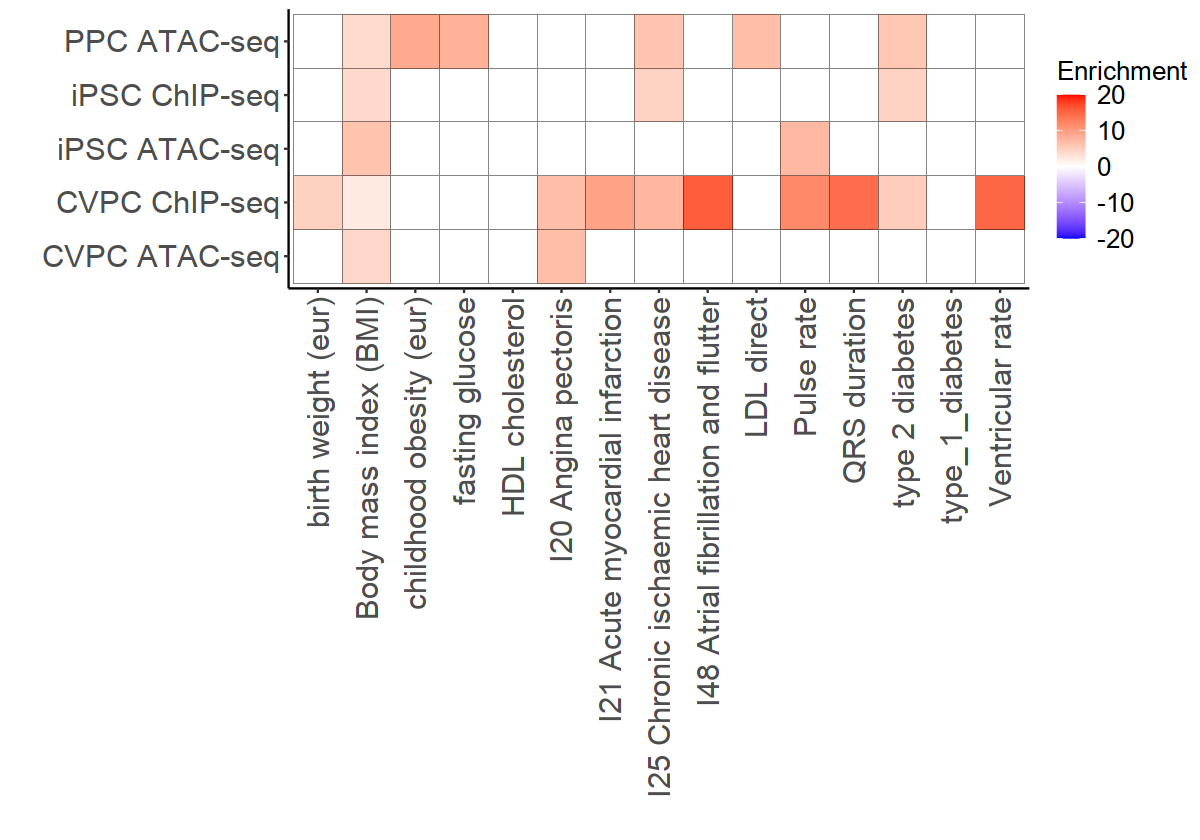

In [71]:
psize(w = 10, h = 7)
ggplot(results, aes(x = description, y = Category, fill = Enrichment)) +
    geom_tile(color = "black") + 
    scale_fill_gradientn(colors = c("blue", "white", "red"), limits = c(-20, 20)) + 
    jn_classic + 
    theme(
        axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)
    )  + xlab("") + ylab("")